# NMR processing

### Library Imports

In [1]:
from spectrochempy.api import *
import os


        SpectroChemPy's API
        Version   : 0.1a2.post46
        Copyright : 2014-2017 - LCS (Laboratory for Catalysis and Spectrochempy)
            


### Import data

Here we import two dataset, one is 1D and the other is 2D

Because , we will sometimes need to recall the original dataset, we create to getting functions

In [2]:
# 1D dataset getting function 
def get_source1D():
    source1D = NDDataset()
    path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_1d')
    source1D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return source1D

# 2D dataset getting function
def get_source2D():
    source2D = NDDataset()
    path = os.path.join(data, 'nmrdata','bruker', 'tests', 'nmr','bruker_2d')
    source2D.read_bruker_nmr(path, expno=1, remove_digital_filter=True)
    return source2D

In [3]:
source1D = get_source1D()
source1D # display info

NDDataset([  -0.419,   -0.216, ...,        0,       -0])

In [4]:
source2D = get_source2D()
source2D

NDDataset([[   0.163,     5.95, ...,        0,       -0],
           [ -0.0466,    -5.94, ...,        0,       -0],
           ..., 
           [ -0.0172,   0.0156, ...,        0,       -0],
           [-0.00654,  -0.0155, ...,        0,       -0]])

### Plot the 1D dataset raw data

<IPython.core.display.Javascript object>


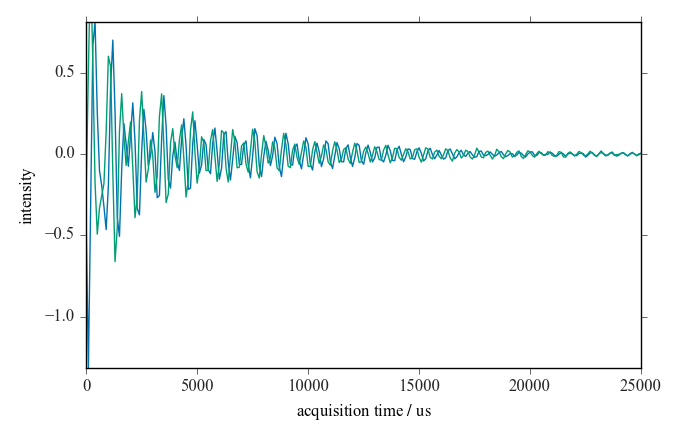

In [5]:
figure()

# plot the real data
source1D.plot(xlim=(0,25000)) 
    # `hold=True` to make that the following plot commands will be on the same graph

# plot the imaginary data on the same plot
source1D.plot(imag=True, data_only=True)
    # `data_only=True` to plot only the additional data, without updating the figure setting 
    # such as xlim and so on.

To display the imaginary part, one can also simply use the show_complex commands.

<IPython.core.display.Javascript object>


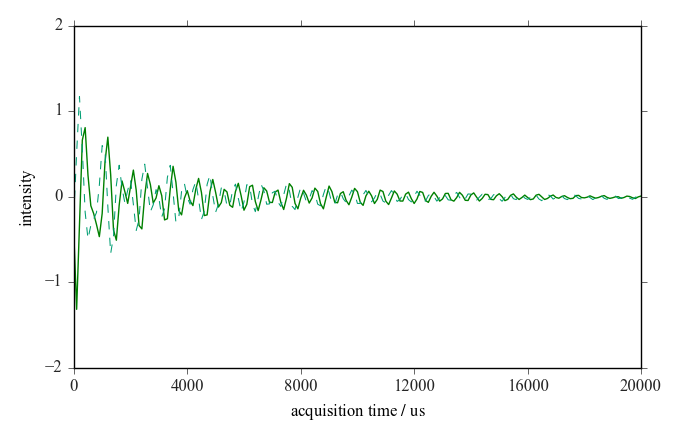

In [6]:
figure() # this is necessary to create a new figure 
         # and so avoid that the output of the next command 
         # is displayed on the previous figure
        
ax = source1D.plot(show_complex=True, color='green',
                xlim=(0.,20000.), zlim=(-2.,2.))

### Plot the 2D dataset raw data

<IPython.core.display.Javascript object>


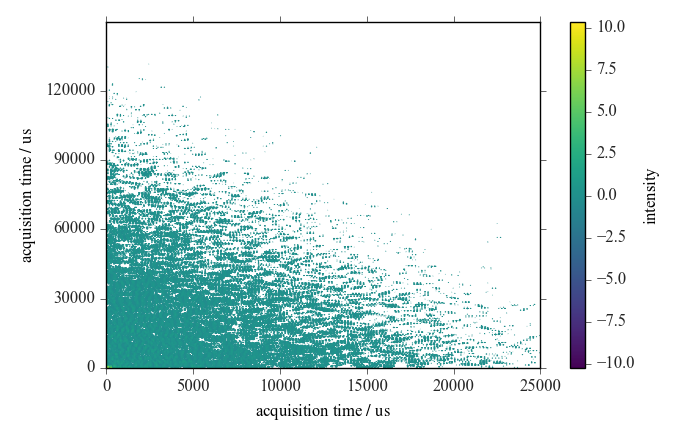

In [7]:
figure()
source2D = get_source2D()
ax = source2D.plot(xlim=(0.,25000.))

probably less util, but multiple display is also possible

<IPython.core.display.Javascript object>


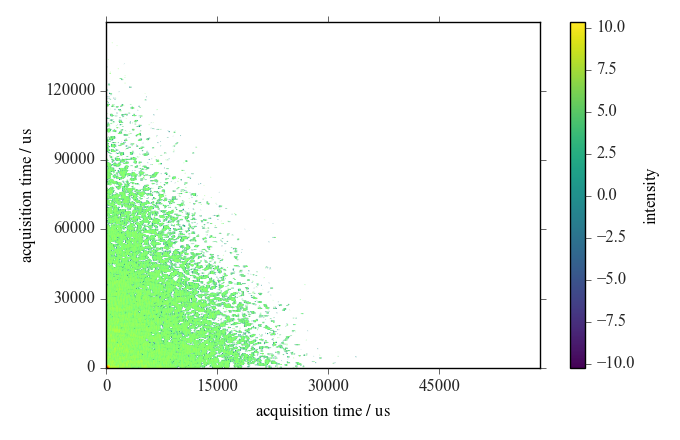

In [11]:
figure()
source2D.plot()
ax = source2D.plot(imag=True, cmap='jet', data_only=True)

## Apodization

<IPython.core.display.Javascript object>


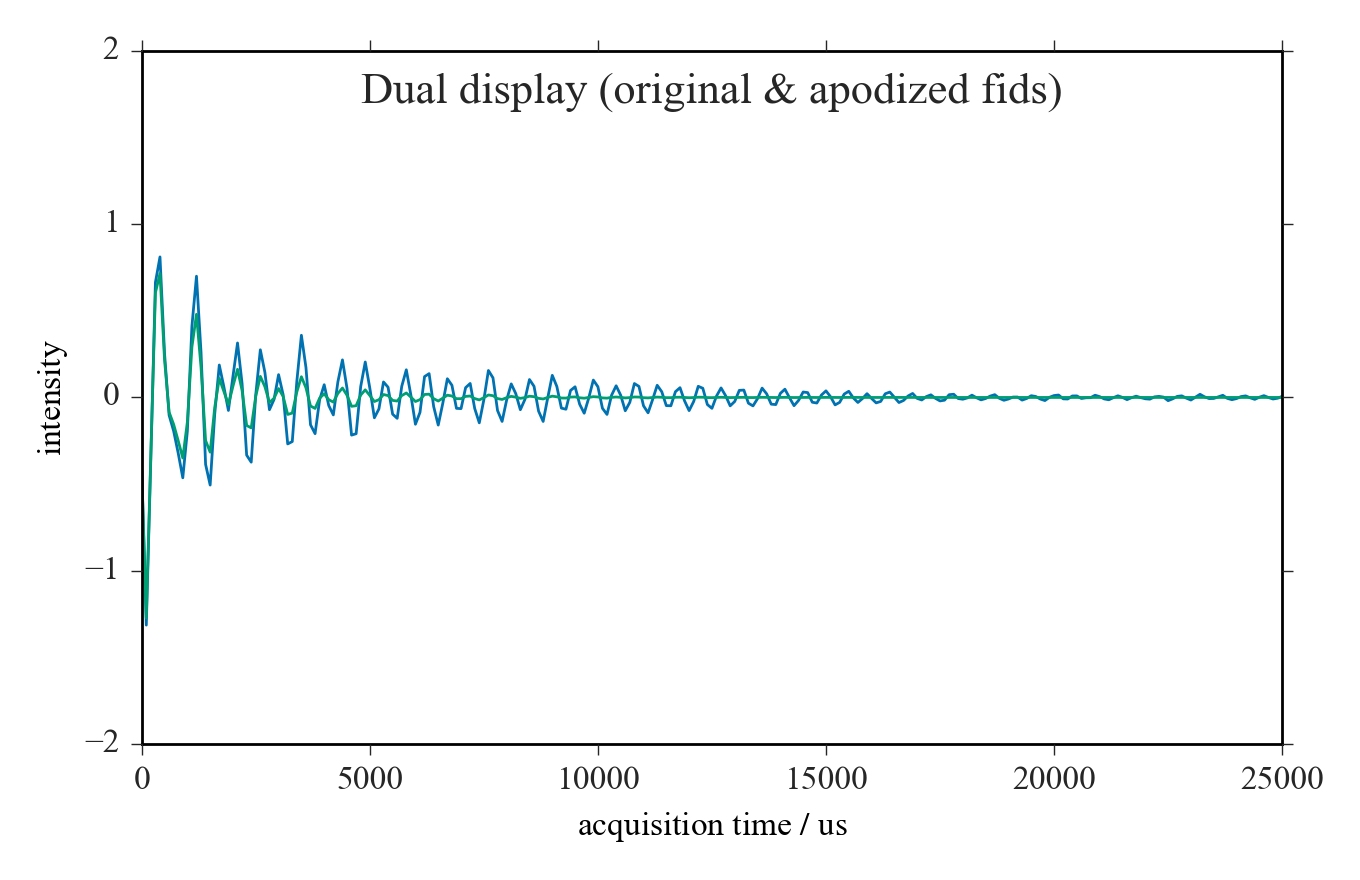

In [15]:
# Plot
figure() # again becessary

source1D = get_source1D() # restore original
p = source1D.plot() 

# create the apodized dataset
lb_source = source1D.em(lb=100.*ur.Hz)

p = lb_source.plot(xlim=(0,25000), zlim=(-2,2))

t = p.text(12500,1.70,'Dual display (original & apodized fids)', ha='center', fontsize=16)

Note that the apodized dataset actually replace the original data

In [16]:
# check that both dataset are the same
lb_source is source1D  # note here, that the original data are modified by default 
                       # when applying apodization function. 
                       # Use the `inplace` keyword to modify this behavior

True

If we want to avoid this behavior and create a new dataset instead, we use the `inplace` flag.

In [17]:
source1D = get_source1D()

lb2_source = source1D.em(lb=100.*ur.Hz, inplace=False)

# check that both dataset are different
lb2_source is not source1D

True

We can also get only the apodization function

<IPython.core.display.Javascript object>


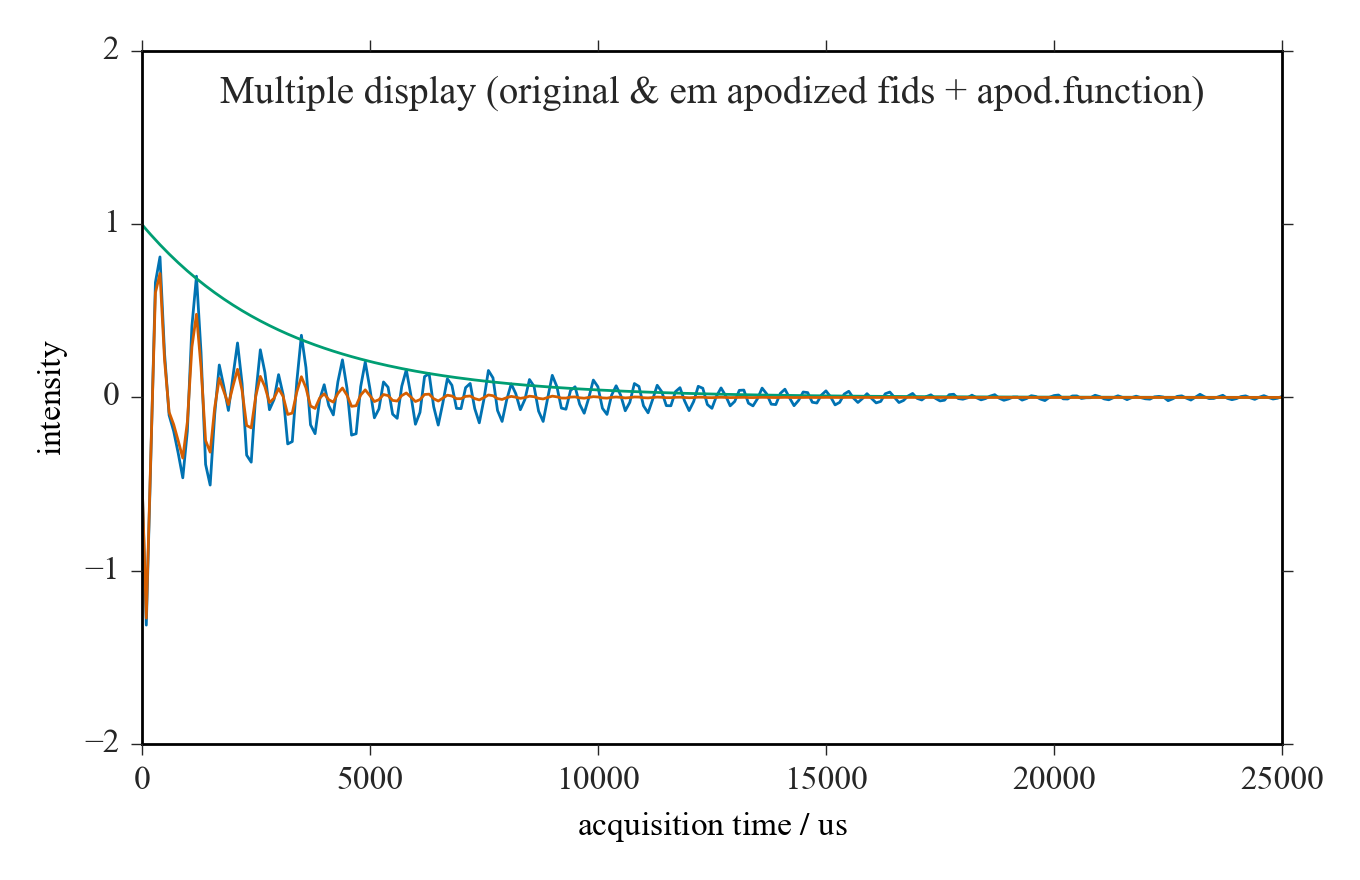

In [22]:
# Plot
figure() # again necessary to start a new figure

source1D = get_source1D() # restore original
p = source1D.plot() 

# create the apodized dataset (if apply is False, the apodization function is not applied to the dataset, 
# but returned)
apodfunc = source1D.em(lb=100.*ur.Hz, apply=False)

p = apodfunc.plot(xlim=(0,25000), zlim=(-2,2))

source1D.em(lb=100.*ur.Hz, apply=True)
p = source1D.plot(data_only=True) 

t = p.text(12500,1.70,'Multiple display (original & em apodized fids + apod.function)', ha='center', fontsize=14)

Apodization function can be em, gm, sp ...

<IPython.core.display.Javascript object>


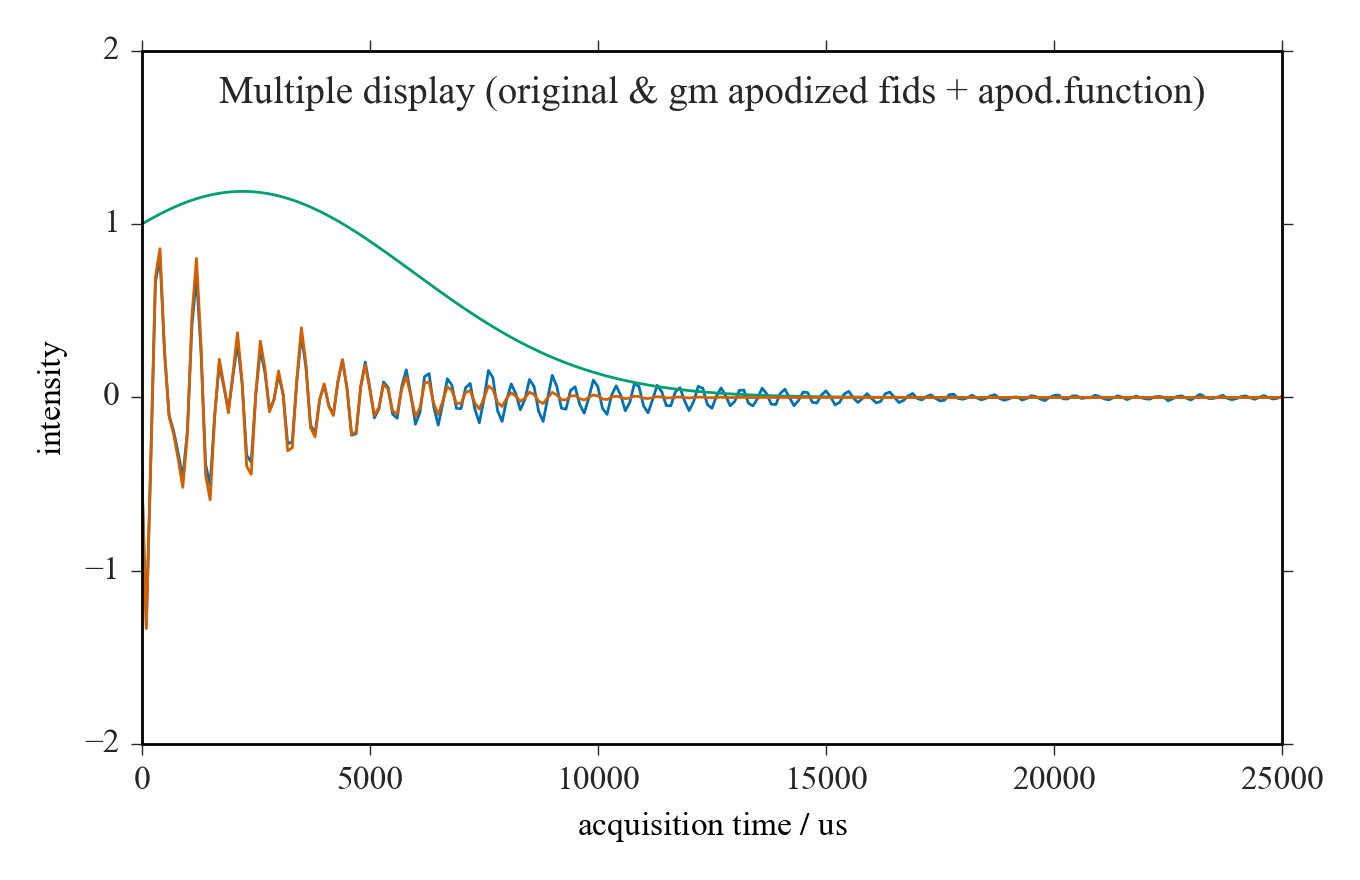

In [40]:
# Plot
figure() # again necessary to start a new figure

source1D = get_source1D() # restore original
p = source1D.plot() 

LB = 50.*ur.Hz
GB = 100.*ur.Hz
apodfunc = source1D.gm(gb=GB, lb=LB, apply=False)

p = apodfunc.plot(xlim=(0,25000), zlim=(-2,2))

source1D.gm(gb=GB, lb=LB) #  apply=True by default
p = source1D.plot(data_only=True) 

t = p.text(12500,1.70,'Multiple display (original & gm apodized fids + apod.function)', ha='center', fontsize=14)

**TODO**: sp function

#### Apodization of 2D data

<IPython.core.display.Javascript object>


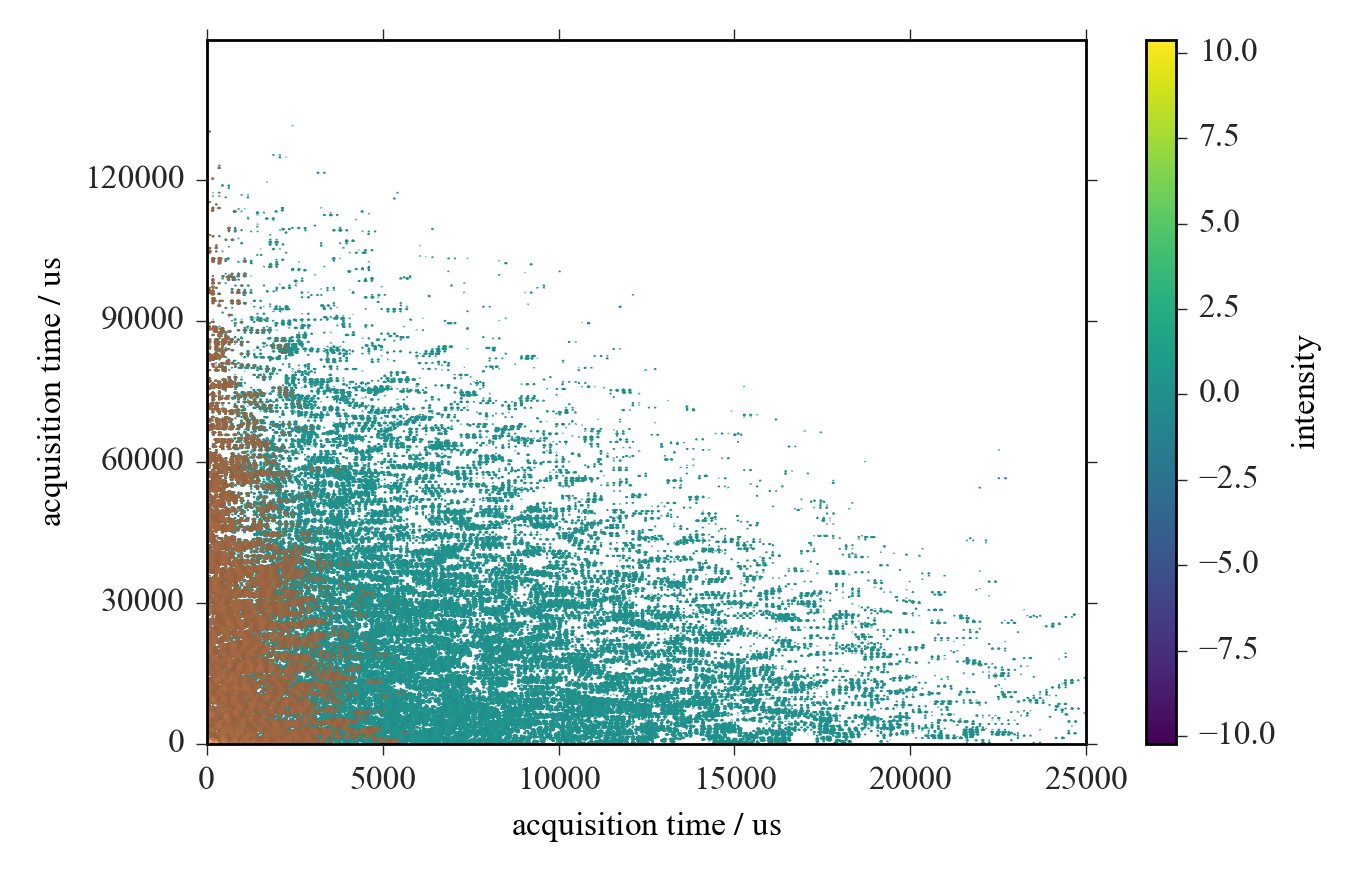

In [58]:
figure()
source2D = get_source2D()
ax = source2D.plot(xlim=(0.,25000.))

LB = 30.*ur.Hz
#source2D.em(lb=LB/10)
source2D.em(lb=LB*3, axis=1)  # IL Y A UNE ERREUR!!!!
ax = source2D.plot(data_only=True, cmap='copper')

### Time-frequency trasforms : FFT

<IPython.core.display.Javascript object>


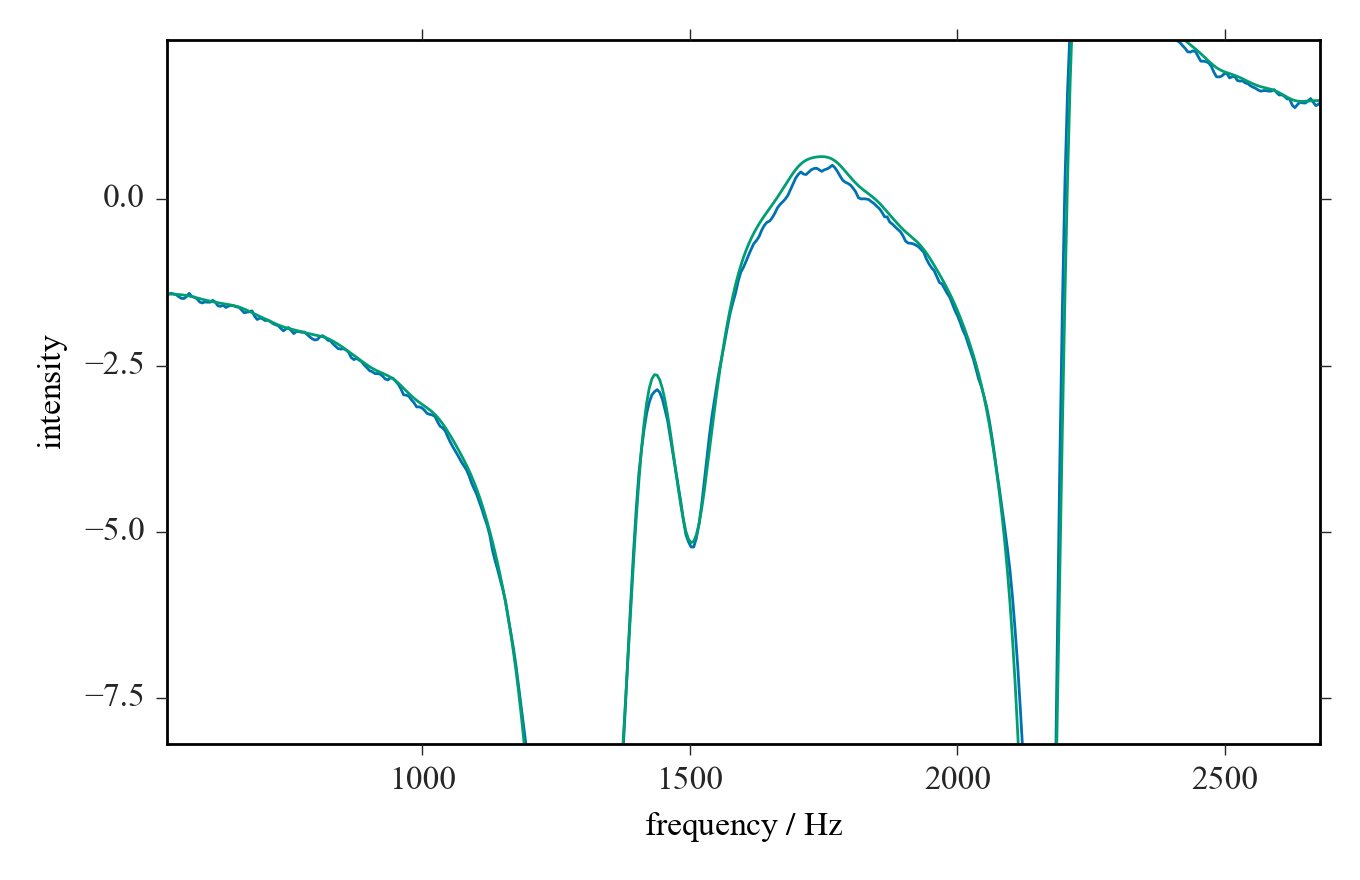

In [47]:
source1D = get_source1D() # restore original
LB = 10.*ur.Hz
source1D.em(lb=LB)
source1D.zf_auto(inplace=True)
transf1 = source1D.fft() # by defauut fft create a new dataset

source1D = get_source1D() # restore original
LB = 10.*ur.Hz
GB = 50.*ur.Hz
source1D.gm(gb=GB, lb=LB)
source1D.zf_auto()
transf2 = source1D.fft()

figure()
transf1.plot() 
p = transf2.plot()   

t = p.text(12500,1.70,'fft transform after em or gm broadening', ha='center', fontsize=14)

As the new dataset is transformed, function that apply to time data such as **em** should not work

In [48]:
_ = transf1.em(lb=10*ur.Hz)

 ERROR | apodization functions apply only to dimensions with [time] dimensionality
